In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import warnings

# seaborn 사용하기
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

warnings.filterwarnings('ignore')

In [13]:
food=pd.read_csv('./Data2/target.csv')

In [14]:
food['상권_구분_코드_명'].unique()

array(['골목상권', '발달상권', '전통시장', '관광특구'], dtype=object)

### 상권 구분 코드 별로 데이터 셋 나누기

In [15]:
golmok = food[food['상권_구분_코드_명'] == '골목상권']
baldal = food[food['상권_구분_코드_명'] == '발달상권']
sijang = food[food['상권_구분_코드_명'] == '전통시장']
travel = food[food['상권_구분_코드_명'] == '관광특구']

In [16]:
# # 위아래 자르기
# from  module.outlier import removeTen
# before=[len(golmok),len(baldal),len(sijang),len(travel)]

# golmok = removeTen(golmok,'분기당_매출_금액')
# baldal = removeTen(baldal,'분기당_매출_금액')
# sijang = removeTen(sijang,'분기당_매출_금액')
# travel = removeTen(travel,'분기당_매출_금액')

# after=[len(golmok),len(baldal),len(sijang),len(travel)]

# for i in range(4):
#     print(after[i] / before[i] * 100)

### 상권 데이터 별 분포 보기
- 10단위로 늘려가면서 보기

In [17]:
def barplot(data):
    cats = pd.cut(data['점포매출액'],
                    [
                    1000000,
                    5000000,
                    10000000,
                    50000000,
                    100000000,
                    500000000,
                    1000000000,
                    5000000000,
                    10000000000,
                    50000000000
                    ],
                    labels=
                    [
                    '100만원이하',
                    '500만원',
                    '1000만원',
                    '5000만원',
                    '1억',
                    '5억',
                    '10억',
                    '50억',
                    '100억'
                    ]
                    )
    
    cats.value_counts().sort_index().plot(
        kind = 'bar'
    )

    sangkwon=data['상권_구분_코드_명'].unique()
    plt.title(f'{sangkwon} 범위별 빈도수')
    plt.savefig(f'./Plot/{sangkwon}범위별빈도수.jpg')
    plt.show()

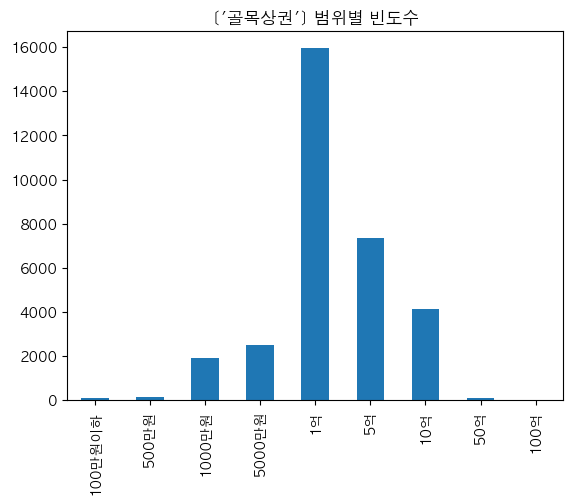

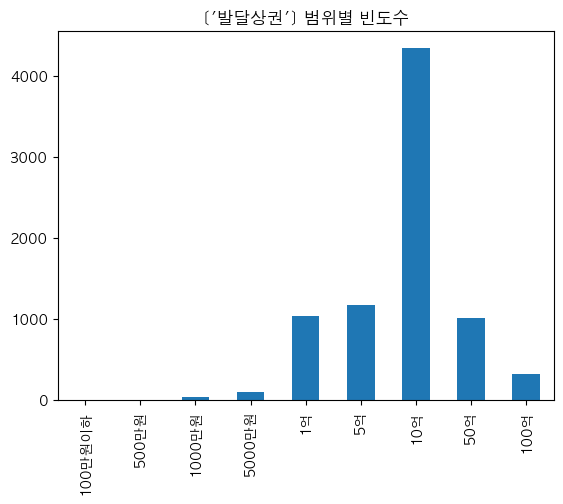

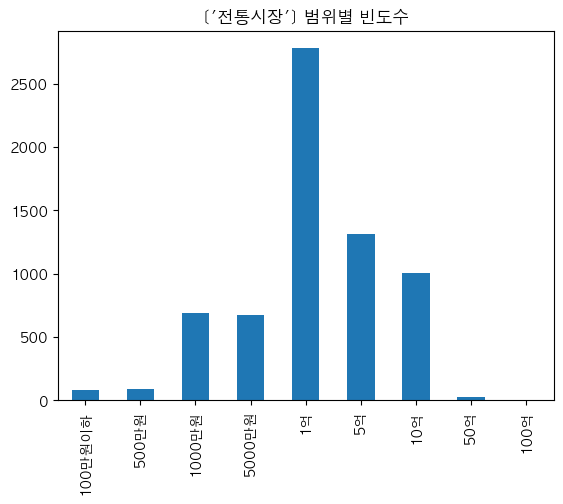

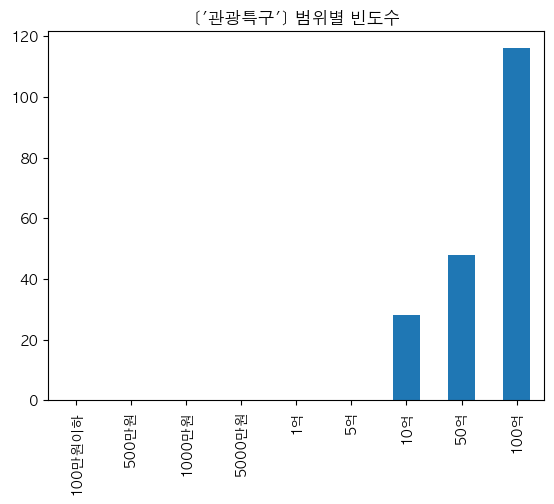

In [18]:
barplot(golmok)
barplot(baldal)
barplot(sijang)
barplot(travel)

### 데이터 수 확인

In [31]:
food.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '시군구코드', '시군구명',
       '행정동_코드', '행정동_코드_명', '상권_코드', '상권_코드_명', '점포수', '총매출액', '점포매출액'],
      dtype='object')

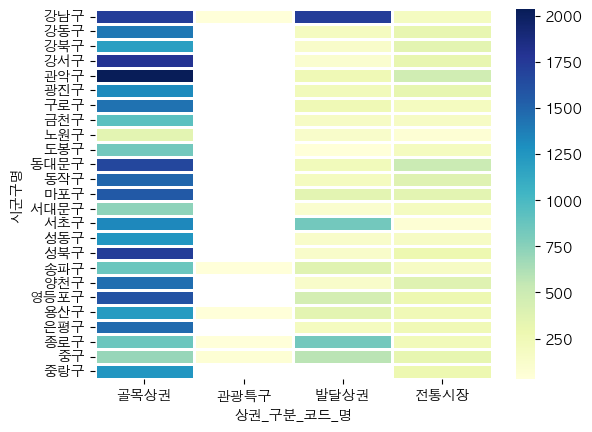

In [32]:
table=food.pivot_table(index=['상권_구분_코드_명'],columns=['시군구명'],aggfunc='size')
sns.heatmap(
	table.T,
	fmt='d',
	cmap='YlGnBu',
	linewidth=2,
	cbar=True
)

# plt.yticks(labels=['골목시장','관광특구','발달상권','전통시장'],ticks=[0.5,1.5,2.5,3.5])

# plt.xticks(labels=['데이터 수'],ticks=[0.5])

plt.show()

### 골목상권의 분포가 범위별로 보았을 때 시군구별로 데이터의 수가 고르고 데이터 수가 많으므로 골목상권 데이터만 가지고 매출 예측 모델 및 분석을 하려고 한다. 

In [35]:
golmok = food[food['상권_구분_코드_명'] == '골목상권']
golmok.to_csv('./Data2/target_golmok.csv',index=False)